In [56]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

## Analise dos dados

In [57]:
DATA_PATH = "../data"
FILE_NAME = "stackoverflow.csv"

In [58]:
pd.set_option('display.max_columns', None)
df = pd.read_csv(f"{DATA_PATH}/{FILE_NAME}")
df.sample(3)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
43986,43987,I agree,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Bootstrapping a business;Professional developm...,"Associate degree (A.A., A.S., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Pluralsight,15,12,"Developer, full-stack","1,000 to 4,999 employees",I have some influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,120000.0,C#;HTML/CSS;JavaScript;PowerShell;SQL;TypeScript,F#,Microsoft SQL Server,NaN,Amazon Web Services (AWS);Microsoft Azure,NaN,Angular;AngularJS;ASP.NET;ASP.NET CORE;jQuery,NaN,.NET (5+) ;.NET Framework (1.0 - 4.8),.NET MAUI,Docker;MSBuild;npm;NuGet,Unreal Engine,Atom;Visual Studio;Visual Studio Code,NaN,Windows,NaN,Azure Devops,NaN,Microsoft Teams,NaN,ChatGPT,NaN,NaN,NaN,Stack Overflow;Stack Exchange,A few times per week,Yes,A few times per month or weekly,"Yes, somewhat",I wouldn't mind low quality posts being flagge...,"No, but I plan to soon",Indifferent,NaN,Highly distrust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,15.0,Agree,Agree,Agree,Agree,Agree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,3-5 times a week,10+ times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Automated testing;Developer po...,NaN,Too long,Easy,120000.0
46470,46471,I agree,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",In-person,Bootstrapping a business,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,26,21,Project manager,NaN,NaN,Investigate,Ask developers I know/work with;Visit develope...,Russian Federation,NaN,NaN,C#;Java,C#;Java,Microsoft SQL Server;PostgreSQL,PostgreSQL,NaN,NaN,ASP.NET CORE;Blazor,ASP.NET CORE;Blazor;React;Vue.js,.NET (5+),.NET (5+) ;Spring Framework,NaN,NaN,IntelliJ IDEA;Visual Studio,IntelliJ IDEA;Visual Studio,Windows,Windows,Redmine;Trello,Jira;Trello,Google Meet;Microsoft Teams;Skype;Telegram;Zoom,Telegram,NaN,NaN,NaN,NaN,Stack Overflow,A few times per month or weekly,Yes,A few times per month or weekly,"No, not really",NaN,"No, but I plan to soon",Favorable,NaN,Somewhat distrust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,22.0,Strongly agree,Neither agree nor disagree,Strongly disagree,Agree,Agree,Strongly disagree,Strongly disagree,Disagree,1-2 times a week,6-10 times a week,6-10 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservice

In [59]:
def converte_yearsCode(row, col):
    years = row[col]
    if years == 'Less than 1 year':
        years = '1'
    elif years == 'More than 50 years':
        years = '50'
    return int(years)

filtered_df = df.dropna(subset=["ConvertedCompYearly", "DevType", "YearsCode", "YearsCodePro"])
no_out_df = filtered_df[np.abs(stats.zscore(filtered_df['ConvertedCompYearly'])) < 3]
no_out_df["YearsCodePro"] = no_out_df.apply(lambda row: converte_yearsCode(row, "YearsCodePro"), axis=1)
no_out_df["YearsCode"] = no_out_df.apply(lambda row: converte_yearsCode(row, "YearsCode"), axis=1)

filtered_df.shape, no_out_df.shape

/tmp/ipykernel_26557/3579111378.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_out_df["YearsCodePro"] = no_out_df.apply(lambda row: converte_yearsCode(row, "YearsCodePro"), axis=1)
/tmp/ipykernel_26557/3579111378.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_out_df["YearsCode"] = no_out_df.apply(lambda row: converte_yearsCode(row, "YearsCode"), axis=1)


((47698, 84), (47666, 84))

### Converter salarios

(array([1.200e+02, 3.720e+02, 1.282e+03, 2.128e+03, 2.385e+03, 1.909e+03,
        1.334e+03, 6.620e+02, 5.340e+02, 3.490e+02, 1.370e+02, 1.370e+02,
        5.000e+01, 1.180e+02, 7.100e+01, 1.600e+01, 6.800e+01, 1.400e+01,
        1.700e+01, 2.600e+01, 3.000e+00, 5.000e+00, 4.000e+00, 9.000e+00,
        6.000e+00, 0.000e+00, 1.200e+01, 1.000e+00, 5.000e+00, 5.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 9.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.00000000e+00, 3.00009800e+04, 6.00009600e+04, 9.00009400e+04,
        1.20000920e+05, 1.50000900e+05, 1.80000880e+05, 2.10000860e+05,
        2.40000840e+05, 2.70000820e+05, 3.00000800e+05, 3.30000780e+05,
        3.60000760e+05, 3.90000740e+05, 4.20000720e+05, 4.50000700e+05,
        4.80000680e+05, 5.10000660e+05, 5.40000640e+05, 5.70000620e+05,
        6.000006

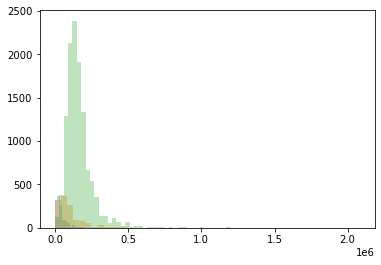

In [60]:
br_df = no_out_df[no_out_df["Country"] == "Brazil"]
br_ppp_df = no_out_df[no_out_df["Country"] == "Brazil"]
eua_df = no_out_df[no_out_df["Country"] == "United States of America"]

plt.hist(br_df["ConvertedCompYearly"], bins=50, alpha=0.33, label="Brazil")
plt.hist(br_df["ConvertedCompYearly"] * 2.44, bins=50, alpha=0.33, label="Brazil_PPP")
plt.hist(eua_df["ConvertedCompYearly"], bins=50, alpha=0.3, label="EUA")

In [61]:
TOP10_COUNTRIES = ["United States of America", "Germany", "India", "United Kingdom of Great Britain and Northern Ireland", "Canada", "France", "Poland", "Netherlands", "Australia", "Brazil", "Italy", "Spain", "Sweden", "Switzerland", "Russian Federation", "Austria", "Israel", "Belgium", "Turkey", "Ukraine", "Denmark", "Romania", "Portugal", "Norway", "Finland", "New Zealand", "China", "Greece"]
PODER_DE_COMPRA_CONVERSAO = {
    "United States of America": (1, 139.7),
    "Germany": (0.7, 131.9),
    "India": (20.22, 216.9),
    "United Kingdom of Great Britain and Northern Ireland": (0.67, 142.7),
    "Canada": (1.17, 134.9),
    "France": (0.67, 124),
    "Poland": (1.88, 158.2),
    "Netherlands": (0.74, 137.7),
    "Australia": (1.39, 139.9),
    "Brazil": (2.44, 213.9),
    "Italy": (0.60, 128.6),
    "Spain": (0.57, 128.0),
    "Sweden": (8.51, 133.5),
    "Switzerland": (0.97, 104.4),
    "Russian Federation": (26.68, 199.4),
    "Austria": (0.71, 143.9),
    "Israel": (3.59, 118.8),
    "Belgium": (0.70, 137.8),
    "Turkey": (6.97, 834.6),
    "Ukraine": (10.52, 429.2),
    "Denmark": (6.11, 125.6),
    "Romania": (1.76, 167.7),
    "Portugal": (0.52, 126.0),
    "Norway": (8.89, 140.7),
    "Finland": (0.76, 131.0),
    "New Zealand": (1.46, 136.9),
    "China": (3.64, 132.2),
    "Greece": (0.52, 115.6)
}

/tmp/ipykernel_26557/161971503.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top30_df["poder_de_compra"] = top30_df.apply(obtem_poder_de_compra,axis=1)


(39798, 85)

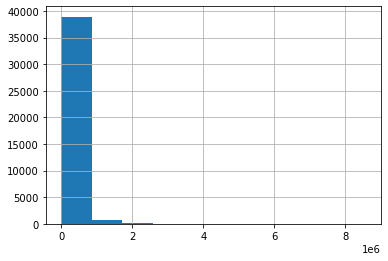

In [62]:
def obtem_poder_de_compra(row):
    vars = PODER_DE_COMPRA_CONVERSAO[row["Country"]]
    return row["ConvertedCompYearly"] * vars[0]

top30_df = no_out_df[no_out_df["Country"].isin(TOP10_COUNTRIES)]
top30_df["poder_de_compra"] = top30_df.apply(obtem_poder_de_compra,axis=1)
# top30_df = top30_df[top30_df["poder_de_compra"] < 3000000]

top30_df["poder_de_compra"].hist()
top30_df.shape

### Stacks

In [63]:
def concatena_stacks(row):
    lang = row["LanguageHaveWorkedWith"]
    db = row["DatabaseHaveWorkedWith"]
    platform = row["PlatformHaveWorkedWith"]
    misc = row["MiscTechHaveWorkedWith"]
    
    languages = np.char.split("" if pd.isnull(lang) else lang, sep=';').tolist()
    # dbs = np.char.split("" if pd.isnull(db) else db, sep=';').tolist()
    # platforms = np.char.split("" if pd.isnull(platform) else platform, sep=';').tolist()
    # miscs = np.char.split("" if pd.isnull(misc) else misc, sep=';').tolist()
    
    # concatenated = languages + dbs + platforms + miscs
    concatenated = languages
    filtered = filter(lambda item: item != "", concatenated)

    return list(filtered)

stacks_df = top30_df
stacks_df["stacks"] = stacks_df.apply(concatena_stacks, axis=1)

df_exploded = stacks_df.explode(column='stacks')
df_one_hot = pd.get_dummies(df_exploded, columns=['stacks'])
df_one_hot = df_one_hot.groupby(level=0).sum()
stacks_df = df_one_hot.join(stacks_df, how="left", lsuffix='_left', rsuffix='')
stacks_df = stacks_df.drop(columns=['poder_de_compra_left'])

stacks_df.sample(1)

/tmp/ipykernel_26557/144660041.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stacks_df["stacks"] = stacks_df.apply(concatena_stacks, axis=1)
/tmp/ipykernel_26557/144660041.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_one_hot = df_one_hot.groupby(level=0).sum()


,ResponseId_left,YearsCode_left,YearsCodePro_left,CompTotal_left,WorkExp_left,ConvertedCompYearly_left,stacks_APL,stacks_Ada,stacks_Apex,stacks_Assembly,stacks_Bash/Shell (all shells),stacks_C,stacks_C#,stacks_C++,stacks_Clojure,stacks_Cobol,stacks_Crystal,stacks_Dart,stacks_Delphi,stacks_Elixir,stacks_Erlang,stacks_F#,stacks_Flow,stacks_Fortran,stacks_GDScript,stacks_Go,stacks_Groovy,stacks_HTML/CSS,stacks_Haskell,stacks_Java,stacks_JavaScript,stacks_Julia,stacks_Kotlin,stacks_Lisp,stacks_Lua,stacks_MATLAB,stacks_Nim,stacks_OCaml,stacks_Objective-C,stacks_PHP,stacks_Perl,stacks_PowerShell,stacks_Prolog,stacks_Python,stacks_R,stacks_Raku,stacks_Ruby,stacks_Rust,stacks_SAS,stacks_SQL,stacks_Scala,stacks_Solidity,stacks_Swift,stacks_TypeScript,stacks_VBA,stacks_Visual Basic (.Net),stacks_Zig,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly,poder_de_compra,stacks
69981,419892,120,84,1080000.0,84.0,219108.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,69982,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Professional development or self-paced learnin...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Formal documentation provided by the owner of ...,Udemy;Udacity,20,14,"Engineer, data",20 to 99 employees,I have little or no influence,NaN,Start a free trial;Ask developers I know/work ...,Brazil,BRL\tBrazilian real,180000.0,C#;JavaScript;Python;SQL;VBA;Visual Basic (.Net),C#;JavaScript;Julia;Python;SQL,Cosmos DB;MariaDB;Microsoft SQL Server;MySQL;P...,BigQuery;Cassandra;Cosmos DB;Microsoft SQL Ser...,Heroku;Microsoft Azure,Amazon Web Services (AWS);Heroku;Microsoft Azure,ASP.NET;Django;Express;Flask;Node.js,ASP.NET;ASP.NET CORE;Express;Flask;Node.js;Nux...,Apache Spark;NumPy;Pandas;React Native,Apache Kafka;Apache Spark;Hadoop;NumPy;Pandas;...,Docker;npm;NuGet;Visual Studio Solution,Docker;Kubernetes;npm;NuGet;Terraform;Visual S...,Jupyter Notebook/JupyterLab;Notepad++;Visual S...,Jupyter Notebook/JupyterLab;Notepad++;Visual S...,Ubuntu;Windows;Windows Subsystem for Linux (WSL),Ubuntu;Windows;Windows Subsystem for Linux (WSL),Azure Devops;Notion;Trello,Azure Devops,Discord;Google Meet;Skype;Whatsapp;Zoom,Discord;Google Meet;Skype;Whatsapp;Zoom,ChatGPT,ChatGPT,NaN,NaN,Stack Overflow,Daily or almost daily,Yes,A few times per month or weekly,Neutral,maybe it can help in the search for an answer ...,Yes,Very favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust,Writing code;Documenting code;Debugging and ge...,Learning about a codebase,NaN,NaN,NaN,NaN,NaN,Learning about a codebase,Yes,Individual 

### DevType

In [64]:
dev_df = df[["DevType"]]
dev_df = dev_df.dropna()
dev_df.sample(3)

,DevType
53973,"Developer, front-end"
75444,"Developer, full-stack"
47188,"Developer, full-stack"


In [65]:
def get_raw_dev_type(row):
    raw = row["DevType"]
    return raw.replace('Developer, ', '')

type_df = dev_df[dev_df["DevType"].str.startswith("Developer")]
type_df = type_df.apply(get_raw_dev_type, axis=1)
type_df.unique(), type_df.unique().__len__()

(array(['back-end', 'front-end', 'full-stack',
        'desktop or enterprise applications', 'QA or test', 'mobile',
        'embedded applications or devices', 'game or graphics',
        'Developer Experience', 'Developer Advocate'], dtype=object),
 10)

In [66]:
DEV_TYPE_BLACK_LIST = ["Student", "Designer", 'Senior-Executive-(C-Suite-VP-etc.)']

def cast_dev_type(row):
    _type = row["DevType"]
    if _type.startswith("Developer"):
        return get_raw_dev_type(row)
    if  _type == "Engineer, data":
        return "data-engineer"
    _type = _type.replace(' ', '-')
    _type = _type.replace(',', '')
    return _type

dev_df = stacks_df
dev_df["FinalDevType"] = dev_df.apply(cast_dev_type, axis=1)
dev_df = dev_df[~dev_df["FinalDevType"].isin(DEV_TYPE_BLACK_LIST)]

dev_df["FinalDevType"].unique(), dev_df["FinalDevType"].shape

(array(['back-end', 'front-end', 'full-stack', 'System-administrator',
        'QA or test', 'Data-scientist-or-machine-learning-specialist',
        'Data-or-business-analyst', 'Security-professional',
        'Research-&-Development-role', 'Database-administrator',
        'desktop or enterprise applications', 'data-engineer',
        'Product-manager', 'Cloud-infrastructure-engineer',
        'embedded applications or devices', 'Developer Experience',
        'Engineering-manager', 'Other-(please-specify):', 'mobile',
        'DevOps-specialist', 'Engineer-site-reliability',
        'Project-manager', 'Academic-researcher', 'Blockchain',
        'game or graphics', 'Developer Advocate', 'Hardware-Engineer',
        'Educator', 'Scientist', 'Marketing-or-sales-professional'],
       dtype=object),
 (39054,))

## Subgroup Discovery

### Filtragens para algortimos

<AxesSubplot:>

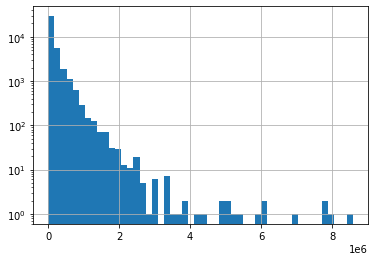

In [18]:
final_df = dev_df
final_df["poder_de_compra"].hist(bins=50, log=True)

In [19]:
final_df[final_df["poder_de_compra"] > 2000000][["poder_de_compra", "Country", "FinalDevType"]]

,poder_de_compra,Country,FinalDevType
626,2401200.00,Russian Federation,Research-&-Development-role
706,2127703.32,Russian Federation,back-end
2140,5175220.34,Sweden,full-stack
5410,2450037.18,India,back-end
5833,2819419.05,Norway,embedded applications or devices
...,...,...,...
85853,6066000.00,India,back-end
86268,6860100.06,India,Hardware-Engineer
86587,3301836.76,Russian Federation,Engineering-manager
86829,2267800.00,Russian Federation,back-end


(34791, 142)

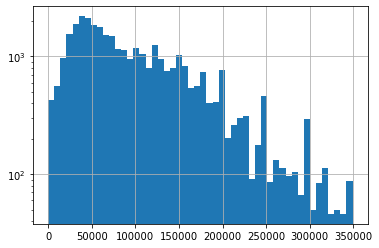

In [20]:
final_df = final_df[final_df["poder_de_compra"] < 350000]

final_df["poder_de_compra"].hist(bins=50, log=True)
final_df.shape

<AxesSubplot:>

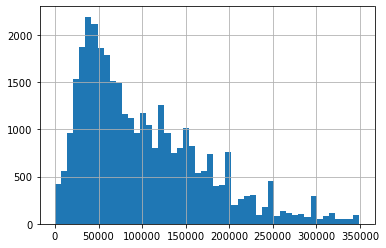

In [21]:
final_df["poder_de_compra"].hist(bins=50)

In [22]:
final_df.sample(2)

,ResponseId_left,CompTotal_left,WorkExp_left,ConvertedCompYearly_left,stacks_APL,stacks_Ada,stacks_Apex,stacks_Assembly,stacks_Bash/Shell (all shells),stacks_C,stacks_C#,stacks_C++,stacks_Clojure,stacks_Cobol,stacks_Crystal,stacks_Dart,stacks_Delphi,stacks_Elixir,stacks_Erlang,stacks_F#,stacks_Flow,stacks_Fortran,stacks_GDScript,stacks_Go,stacks_Groovy,stacks_HTML/CSS,stacks_Haskell,stacks_Java,stacks_JavaScript,stacks_Julia,stacks_Kotlin,stacks_Lisp,stacks_Lua,stacks_MATLAB,stacks_Nim,stacks_OCaml,stacks_Objective-C,stacks_PHP,stacks_Perl,stacks_PowerShell,stacks_Prolog,stacks_Python,stacks_R,stacks_Raku,stacks_Ruby,stacks_Rust,stacks_SAS,stacks_SQL,stacks_Scala,stacks_Solidity,stacks_Swift,stacks_TypeScript,stacks_VBA,stacks_Visual Basic (.Net),stacks_Zig,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly,poder_de_compra,stacks,FinalDevType
25061,150372,780000.0,30.0,780000.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,25062,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,NaN,Codecademy;Udemy,8,5,"Developer, full-stack",100 to 499 employees,I have little or no influence,NaN,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,130000.0,Bash/Shell (all shells);Groovy;HTML/CSS;Java;S...,Bash/Shell (all shells);HTML/CSS;Java;Kotlin;S...,BigQuery;MySQL,MySQL,Amazon Web Services (AWS),Amazon Web Services (AWS),Angular;Spring Boot,Angular;Spring Boot,NaN,NaN,NaN,NaN,IntelliJ IDEA;Visual Studio Code,IntelliJ IDEA;Visual Studio Code,iPadOS;MacOS;Windows,MacOS,Jira;Trello,Jira;Trello,Discord;Microsoft Teams;Signal;Slack;Zoom,Discord;Microsoft Teams;Signal;Slack,NaN,NaN,NaN,NaN,Stack Overflow,A few times per month or weekly,Not sure/can't remember,NaN,Neutral,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,5.0,Agree,Agree,Agree,Agree,Agree,Disagree,Strongly agree,Agree,1-2 times a week,3-5 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Automated testing;Observability tools;Continuo...,"Information Services, IT, Software Development...",Appropriate in length,Easy,130000.0,130000.0,"[Bash/Shell (all shells), Groovy, HTML/CSS, Ja...",full-stack
84325,252978,756000.0,12.0,163125.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,84326,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Bootstrapping a business,"Master’s degr

In [24]:
SPACE_COLS = ["Age", "Employment", "RemoteWork", "EdLevel", "OrgSize", "Country"]

def removeSpace(str):
    return str.replace(' ', '-').replace(',', '')

def handleSpaceCols(row, col):
    if row[col] is None:
        return 0
    return removeSpace(row[col])

subgroup_df = final_df.drop(columns=["ResponseId_left", "CompTotal_left", "WorkExp_left", "ConvertedCompYearly_left", "ResponseId", "Q120", "MainBranch",
                                     "CodingActivities", "LearnCode", "LearnCodeOnline", "LearnCodeCoursesCert", "DevType", "PurchaseInfluence",
                                     "TechList", "BuyNewTool", "Currency", "CompTotal", "LanguageHaveWorkedWith", "LanguageWantToWorkWith", "DatabaseHaveWorkedWith",
                                     "DatabaseWantToWorkWith", "PlatformHaveWorkedWith", "PlatformWantToWorkWith", "WebframeHaveWorkedWith", "WebframeWantToWorkWith",
                                     "MiscTechHaveWorkedWith", "MiscTechWantToWorkWith", "ToolsTechHaveWorkedWith", "ToolsTechWantToWorkWith", "NEWCollabToolsHaveWorkedWith",
                                     "NEWCollabToolsWantToWorkWith", "OpSysPersonal use", "OpSysProfessional use", "OfficeStackAsyncHaveWorkedWith",
                                     "OfficeStackAsyncWantToWorkWith", "AISearchHaveWorkedWith", "AISearchWantToWorkWith", "AIDevHaveWorkedWith", 
                                     "AIDevWantToWorkWith", "NEWSOSites", "SOVisitFreq", "SOAccount", "SOPartFreq", "SOComm", "SOAI", "AISelect", 
                                     "AISent", "AIAcc", "AIBen", "AIToolInterested in Using", "AIToolCurrently Using", 
                                     "AIToolNot interested in Using", "AINextVery different", "AINextNeither different nor similar", 
                                     "AINextSomewhat similar", "AINextVery similar", "AINextSomewhat different", "TBranch", "ICorPM", "WorkExp", 
                                     "Knowledge_1", "Knowledge_2", "Knowledge_3", "Knowledge_4", "Knowledge_5", "Knowledge_6", "Knowledge_7", 
                                     "Knowledge_8", "Frequency_1", "Frequency_2", "Frequency_3", "TimeSearching", "TimeAnswering", "ProfessionalTech",
                                     "Industry", "SurveyLength", "SurveyEase", "ConvertedCompYearly", "OfficeStackSyncHaveWorkedWith",
                                     "OfficeStackSyncWantToWorkWith", "stacks"])
subgroup_df = subgroup_df.dropna(subset=["OrgSize"])

for col in SPACE_COLS:
    subgroup_df[col] = subgroup_df.apply(lambda row: handleSpaceCols(row, col), axis=1)
subgroup_df.sample(1)

,stacks_APL,stacks_Ada,stacks_Apex,stacks_Assembly,stacks_Bash/Shell (all shells),stacks_C,stacks_C#,stacks_C++,stacks_Clojure,stacks_Cobol,stacks_Crystal,stacks_Dart,stacks_Delphi,stacks_Elixir,stacks_Erlang,stacks_F#,stacks_Flow,stacks_Fortran,stacks_GDScript,stacks_Go,stacks_Groovy,stacks_HTML/CSS,stacks_Haskell,stacks_Java,stacks_JavaScript,stacks_Julia,stacks_Kotlin,stacks_Lisp,stacks_Lua,stacks_MATLAB,stacks_Nim,stacks_OCaml,stacks_Objective-C,stacks_PHP,stacks_Perl,stacks_PowerShell,stacks_Prolog,stacks_Python,stacks_R,stacks_Raku,stacks_Ruby,stacks_Rust,stacks_SAS,stacks_SQL,stacks_Scala,stacks_Solidity,stacks_Swift,stacks_TypeScript,stacks_VBA,stacks_Visual Basic (.Net),stacks_Zig,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,OrgSize,Country,poder_de_compra,FinalDevType
52702,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,35-44-years-old,Employed-full-time,Hybrid-(some-remote-some-in-person),Master’s-degree-(M.A.-M.S.-M.Eng.-MBA-etc.),10,7,100-to-499-employees,Austria,60827.12,full-stack


### Slices DB into quartiles

In [25]:
subgroup_df["quartile"] = pd.qcut(subgroup_df['poder_de_compra'], 4, labels=False)

quartile_1 = subgroup_df[subgroup_df['quartile'] == 0]
quartile_2 = subgroup_df[subgroup_df['quartile'] == 1]
quartile_3 = subgroup_df[subgroup_df['quartile'] == 2]
quartile_4 = subgroup_df[subgroup_df['quartile'] == 3]

count    8.696000e+03
mean     4.565499e-17
std      1.000058e+00
min     -2.577489e+00
25%     -6.267380e-01
50%      1.798376e-01
75%      8.156962e-01
max      1.414078e+00
Name: poder_de_compra, dtype: float64

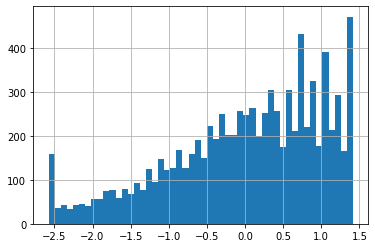

In [28]:
scaler = StandardScaler()

to_save = quartile_1.drop(columns=["quartile"])
to_save["poder_de_compra"] = scaler.fit_transform(to_save[["poder_de_compra"]])
# to_save["poder_de_compra"] = np.log10(to_save["poder_de_compra"])
to_save["poder_de_compra"].hist(bins=50)
to_save["poder_de_compra"].describe()

In [27]:
SUBGROUP_OUTPUT_PATH = "./data/in/in_sd_4_log_outlier<350000.csv"

to_save.to_csv(SUBGROUP_OUTPUT_PATH, index=False)

## Frequente Patterns

###  Preparando

In [78]:
fp_df = dev_df
fp_df.shape

(39054, 144)

<AxesSubplot:>

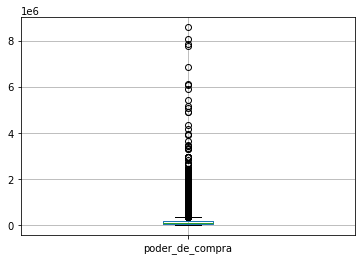

In [79]:
fp_df.boxplot(column="poder_de_compra")

<AxesSubplot:>

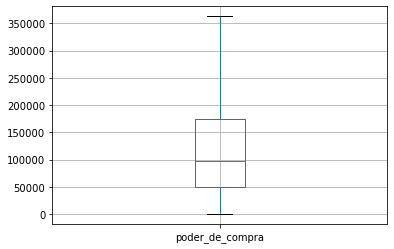

In [80]:
fp_df.boxplot(column="poder_de_compra", showfliers=False)

In [81]:
SPACE_COLS = ["Age", "Employment", "RemoteWork", "EdLevel", "OrgSize", "Country"]

def removeSpace(str):
    return str.replace(' ', '-').replace(',', '')

def handleSpaceCols(row, col):
    if row[col] is None:
        return 0
    return removeSpace(row[col])

fp_df = fp_df.drop(columns=["ResponseId_left", "CompTotal_left", "WorkExp_left", "ConvertedCompYearly_left", "ResponseId", "Q120", "MainBranch",
                            "CodingActivities", "LearnCode", "LearnCodeOnline", "LearnCodeCoursesCert", "DevType", "PurchaseInfluence",
                            "TechList", "BuyNewTool", "Currency", "CompTotal", "LanguageHaveWorkedWith", "LanguageWantToWorkWith", "DatabaseHaveWorkedWith",
                            "DatabaseWantToWorkWith", "PlatformHaveWorkedWith", "PlatformWantToWorkWith", "WebframeHaveWorkedWith", "WebframeWantToWorkWith",
                            "MiscTechHaveWorkedWith", "MiscTechWantToWorkWith", "ToolsTechHaveWorkedWith", "ToolsTechWantToWorkWith", "NEWCollabToolsHaveWorkedWith",
                            "NEWCollabToolsWantToWorkWith", "OpSysPersonal use", "OpSysProfessional use", "OfficeStackAsyncHaveWorkedWith",
                            "OfficeStackAsyncWantToWorkWith", "AISearchHaveWorkedWith", "AISearchWantToWorkWith", "AIDevHaveWorkedWith", 
                            "AIDevWantToWorkWith", "NEWSOSites", "SOVisitFreq", "SOAccount", "SOPartFreq", "SOComm", "SOAI", "AISelect", 
                            "AISent", "AIAcc", "AIBen", "AIToolInterested in Using", "AIToolCurrently Using", 
                            "AIToolNot interested in Using", "AINextVery different", "AINextNeither different nor similar", 
                            "AINextSomewhat similar", "AINextVery similar", "AINextSomewhat different", "TBranch", "ICorPM", "WorkExp", 
                            "Knowledge_1", "Knowledge_2", "Knowledge_3", "Knowledge_4", "Knowledge_5", "Knowledge_6", "Knowledge_7", 
                            "Knowledge_8", "Frequency_1", "Frequency_2", "Frequency_3", "TimeSearching", "TimeAnswering", "ProfessionalTech",
                            "Industry", "SurveyLength", "SurveyEase", "ConvertedCompYearly", "OfficeStackSyncHaveWorkedWith",
                            "OfficeStackSyncWantToWorkWith",
                            'stacks_APL', 'stacks_Ada', 'stacks_Apex', 'stacks_Assembly', 'stacks_Bash/Shell (all shells)', 
                            'stacks_C', 'stacks_C#', 'stacks_C++', 'stacks_Clojure', 'stacks_Cobol', 
                            'stacks_Crystal', 'stacks_Dart', 'stacks_Delphi', 'stacks_Elixir', 'stacks_Erlang', 
                            'stacks_F#', 'stacks_Flow', 'stacks_Fortran', 'stacks_GDScript', 'stacks_Go', 
                            'stacks_Groovy', 'stacks_HTML/CSS', 'stacks_Haskell', 'stacks_Java', 
                            'stacks_JavaScript', 'stacks_Julia', 'stacks_Kotlin', 'stacks_Lisp', 'stacks_Lua',
                            'stacks_MATLAB', 'stacks_Nim', 'stacks_OCaml', 'stacks_Objective-C', 'stacks_PHP',
                            'stacks_Perl', 'stacks_PowerShell', 'stacks_Prolog', 'stacks_Python', 'stacks_R',
                            'stacks_Raku', 'stacks_Ruby', 'stacks_Rust', 'stacks_SAS', 'stacks_SQL',
                            'stacks_Scala', 'stacks_Solidity', 'stacks_Swift', 'stacks_TypeScript',
                            'stacks_VBA', 'stacks_Visual Basic (.Net)', 'stacks_Zig'])
fp_df = fp_df.dropna(subset=["OrgSize"])
fp_df = fp_df[fp_df["poder_de_compra"] < 2000000]

for col in SPACE_COLS:
    fp_df[col] = fp_df.apply(lambda row: handleSpaceCols(row, col), axis=1)
fp_df.sample(1)

,YearsCode_left,YearsCodePro_left,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,OrgSize,Country,poder_de_compra,stacks,FinalDevType
25158,75,60,35-44-years-old,Employed-full-time;Independent-contractor-free...,Remote,Bachelor’s-degree-(B.A.-B.S.-B.Eng.-etc.),25,20,20-to-99-employees,United-States-of-America,110000.0,"[HTML/CSS, JavaScript, PHP]",back-end


In [89]:
fp_df["quartile"] = pd.qcut(fp_df['poder_de_compra'], 4, labels=False)

fp_quartile_1 = fp_df[fp_df['quartile'] == 0]
fp_quartile_2 = fp_df[fp_df['quartile'] == 1]
fp_quartile_3 = fp_df[fp_df['quartile'] == 2]
fp_quartile_4 = fp_df[fp_df['quartile'] == 3]

df_list = {"25":fp_quartile_1,"50":fp_quartile_2,"75": fp_quartile_3, "100": fp_quartile_4}

### Salvando no padrão

In [100]:
fp_df = fp_df.drop(columns=["quartile"])
fp_df.sample(1)

,YearsCode_left,YearsCodePro_left,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,OrgSize,Country,poder_de_compra,stacks,FinalDevType
57934,27,15,25-34-years-old,Employed-full-time,In-person,Bachelor’s-degree-(B.A.-B.S.-B.Eng.-etc.),9,5,20-to-99-employees,United-States-of-America,102000.0,"[C#, HTML/CSS, VBA]",desktop or enterprise applications


In [101]:
FP_COLUMNS = ["Age", "Employment", "RemoteWork", "EdLevel", "YearsCode", "YearsCodePro", "OrgSize", "Country", "FinalDevType"]

unique_stacks = fp_df["stacks"].explode().unique()

other_uniques = {}

for col in FP_COLUMNS:
    other_uniques[col] = fp_df[col].unique()

In [124]:
final_map = {}
size = 1

for i in range(unique_stacks.shape[0]):
    final_map[unique_stacks[i]] = size
    size += 1

for (col, uniques) in other_uniques.items():
    for i in range(uniques.shape[0]):
        final_map[str(uniques[i])] = size
        size += 1

In [103]:
OUTPUT_PATH = "./data/fp/out/"
FILE_NAME = "in_fp"

In [128]:
import subprocess

for quartile, df in df_list.items():
    casted_file = f"{OUTPUT_PATH}/{FILE_NAME}_{quartile}.txt"
    with open(casted_file, 'w') as file:
        file.write("@CONVERTED_FROM_TEXT\n")
        # Header
        for (key, item) in final_map.items():
            file.write(f"@ITEM={item}={key},\n")
        # Sequences
        for row in df.itertuples():
            casted_items = []
            for col in FP_COLUMNS:
                idd = final_map[str(getattr(row, col))]
                if idd == 20:
                    a = 2
                casted_items.append(str(idd))
            # casted_items += list(map(lambda x: str(final_map[x]), row.stacks))
            file.write(f"{' '.join(casted_items)}\n")
    
        subprocess.run(["java", "-jar", "../HighUtilityItemsetMining/spmf.jar", "run", "FPGrowth_itemsets", f"{casted_file}",  f"{OUTPUT_PATH}/output_{quartile}.txt","30%"])

>/home/vinicius/UFMG/8p/AD/TP/HighUtilityItemsetMining/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 9615
 Max memory usage: 22.50115203857422 mb 
 Frequent itemsets count : 32
 Total time ~ 136 ms
Post-processing to show result in terms of string values.
Post-processing completed.
>/home/vinicius/UFMG/8p/AD/TP/HighUtilityItemsetMining/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 9591
 Max memory usage: 22.264442443847656 mb 
 Frequent itemsets count : 31
 Total time ~ 228 ms
Post-processing to show result in terms of string values.
Post-processing completed.
>/home/vinicius/UFMG/8p/AD/TP/HighUtilityItemsetMining/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 9724
 Max memory usage: 24.071327209472656 mb 
 Frequent itemsets count : 52
 Total time ~ 159 ms
Post-processing to show result in terms of string values.
Post-processing complet